In [3]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [4]:
file_name = "client1.csv"
df = pd.read_csv(file_name)
df.head(3)

,Time,Arr_time,Del_Time,Stall_Dur,Rep_Level,Del_Rate,Act_Rate,Byte_Size,Buff_Level,RTT,Width,Height,MemoryV %,CPU Load,Wi-Fi RSSI Level,P.1203 QoE
0,0,318,318,0,237,7735,308,308446,8.000,0.074,320,180,0.45,0.34,-65,1.87753
1,8,711,318,0,237,5629,223,223794,16.000,0.077,320,180,0.46,0.56,-64,1.87753
2,16,1082,293,0,237,5571,204,204473,23.706,0.099,320,180,0.45,0.72,-60,1.87753


In [5]:
#date_time = pd.to_datetime(df.pop('Min'), format='%H:%M:%S').dt.time
timestamp_s = df['Time']
df.head(3)

,Time,Arr_time,Del_Time,Stall_Dur,Rep_Level,Del_Rate,Act_Rate,Byte_Size,Buff_Level,RTT,Width,Height,MemoryV %,CPU Load,Wi-Fi RSSI Level,P.1203 QoE
0,0,318,318,0,237,7735,308,308446,8.000,0.074,320,180,0.45,0.34,-65,1.87753
1,8,711,318,0,237,5629,223,223794,16.000,0.077,320,180,0.46,0.56,-64,1.87753
2,16,1082,293,0,237,5571,204,204473,23.706,0.099,320,180,0.45,0.72,-60,1.87753


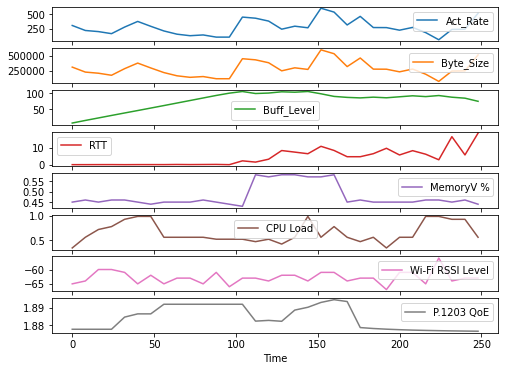

In [6]:
plot_cols = ['Act_Rate','Byte_Size','Buff_Level','RTT','MemoryV %','CPU Load','Wi-Fi RSSI Level','P.1203 QoE' ] 

plot_features = df[plot_cols]
plot_features.index = timestamp_s
_ = plot_features.plot(subplots=True)


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,32.0,124.000000,75.046652,0.00000,62.00000,124.000000,186.00000,248.00000
Arr_time,32.0,87720.750000,99332.910910,318.00000,3469.25000,36903.000000,167584.25000,301167.00000
Del_Time,32.0,5668.875000,5625.329403,162.00000,318.00000,4805.000000,10085.25000,17665.00000
Stall_Dur,32.0,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
Rep_Level,32.0,267.187500,57.961855,237.00000,237.00000,237.000000,237.00000,375.00000
Del_Rate,32.0,2586.812500,2955.196085,110.00000,253.50000,455.500000,5585.50000,7735.00000
Act_Rate,32.0,282.093750,130.987406,65.00000,199.75000,270.500000,332.00000,602.00000
Byte_Size,32.0,282533.406250,131018.686658,65011.00000,200240.25000,271038.500000,332268.00000,602572.00000
Buff_Level,32.0,77.339875,27.577820,8.00000,67.87450,87.604000,94.58750,105.53900
RTT,32.0,4.314312,4.832955,0.06600,0.10550,3.063000,6.65275,18.33200


(1.87639, 1.89473, 8.0, 105.539)

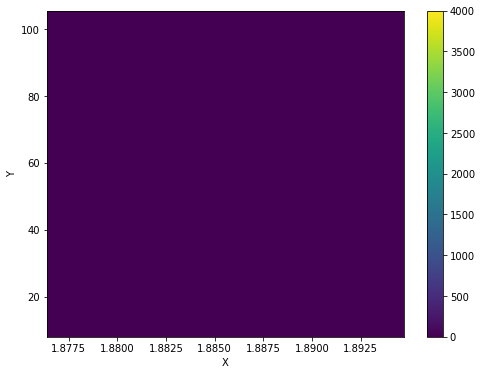

In [8]:
plt.hist2d(df['P.1203 QoE'], df['Buff_Level'], bins=(50, 50), vmax=4000)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
ax = plt.gca()
ax.axis('tight')

In [9]:
#timestamp_s = date_time.map(pd.Timestamp.timestamp)


#timestamp_s = lambda data: datetime.datetime.strptime(date_time, '%H:%M:%S').timestamp()

print(timestamp_s)

0       0
1       8
2      16
3      24
4      32
5      40
6      48
7      56
8      64
9      72
10     80
11     88
12     96
13    104
14    112
15    120
16    128
17    136
18    144
19    152
20    160
21    168
22    176
23    184
24    192
25    200
26    208
27    216
28    224
29    232
30    240
31    248
Name: Time, dtype: int64


In [10]:


minute = 60
hour = 60*60

df['Min sin'] = np.sin(timestamp_s * (2 * np.pi / minute))
df['Min cos'] = np.cos(timestamp_s * (2 * np.pi / minute))
df['Hour sin'] = np.sin(timestamp_s * (2 * np.pi / hour))
df['Hour cos'] = np.cos(timestamp_s * (2 * np.pi / hour))

In [11]:
column_indices = {name: i for i, name in enumerate(df.columns)}



n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

print(column_indices)

{'Time': 0, 'Arr_time': 1, 'Del_Time': 2, 'Stall_Dur': 3, 'Rep_Level': 4, 'Del_Rate': 5, 'Act_Rate': 6, 'Byte_Size': 7, 'Buff_Level': 8, 'RTT': 9, 'Width': 10, 'Height': 11, 'MemoryV %': 12, 'CPU Load': 13, 'Wi-Fi RSSI Level': 14, 'P.1203 QoE': 15, 'Min sin': 16, 'Min cos': 17, 'Hour sin': 18, 'Hour cos': 19}


In [14]:
n = len(df)
print(num_features)

20


Text(0.5, 1.0, 'Time of day signal')

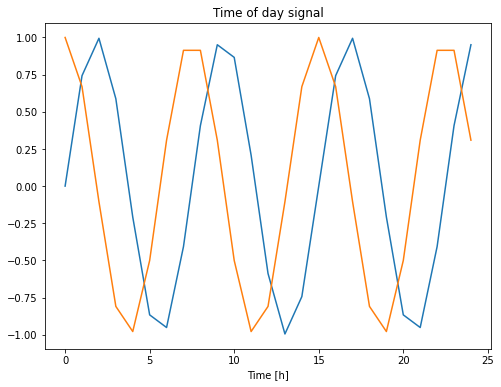

In [13]:
plt.plot(np.array(df['Min sin'])[:25])
plt.plot(np.array(df['Min cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [14]:
fft = tf.signal.rfft(df['P.1203 QoE'])


In [27]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
print(column_indices)

{'Time': 0, 'Arr_time ': 1, 'Del_Time': 2, 'Stall_Dur': 3, 'Rep_Level': 4, 'Del_Rate': 5, 'Act_Rate': 6, 'Byte_Size': 7, 'Buff_Level': 8, 'RTT': 9, 'Width': 10, 'Height': 11, 'MemoryV %': 12, 'CPU Load': 13, 'Wi-Fi RSSI Level': 14, 'P.1203 QoE': 15, 'Min sin': 16, 'Min cos': 17, 'Hour sin': 18, 'Hour cos': 19}


In [28]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

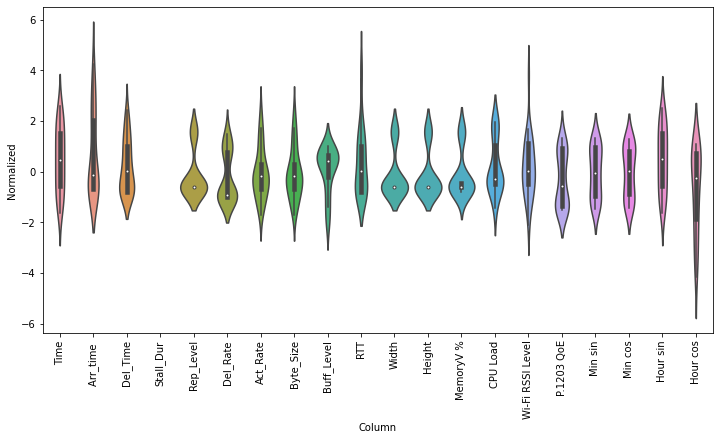

In [29]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [30]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [31]:
w1 = WindowGenerator(input_width=1, label_width=1, shift=1,
                     label_columns=['P.1203 QoE'])
w1

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['P.1203 QoE']

In [32]:
w2 = WindowGenerator(input_width=2, label_width=2, shift=1,
                     label_columns=['P.1203 QoE'])
w2

Total window size: 3
Input indices: [0 1]
Label indices: [1 2]
Label column name(s): ['P.1203 QoE']

In [33]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [34]:
w2.total_window_size

3

In [35]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[10:10+w2.total_window_size]),
                           np.array(train_df[15:15+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 3, 20)
Inputs shape: (3, 2, 20)
Labels shape: (3, 2, 1)


In [36]:
w2.example = example_inputs, example_labels

In [37]:
def plot(self, model=None, plot_col='P.1203 QoE', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time')

WindowGenerator.plot = plot

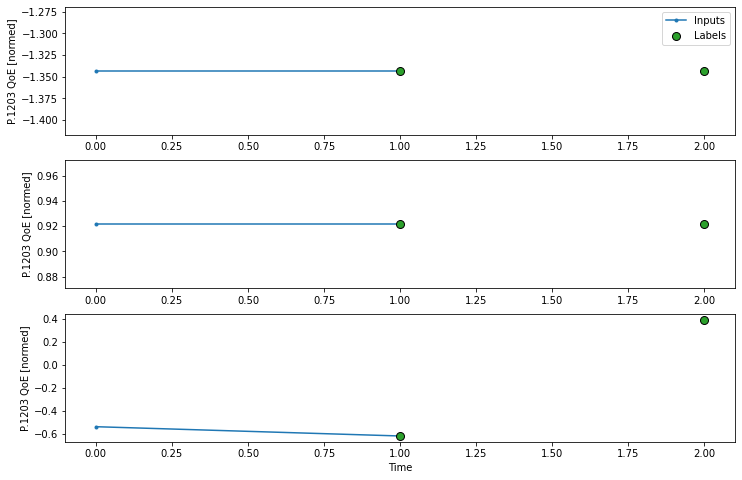

In [38]:
w2.plot()

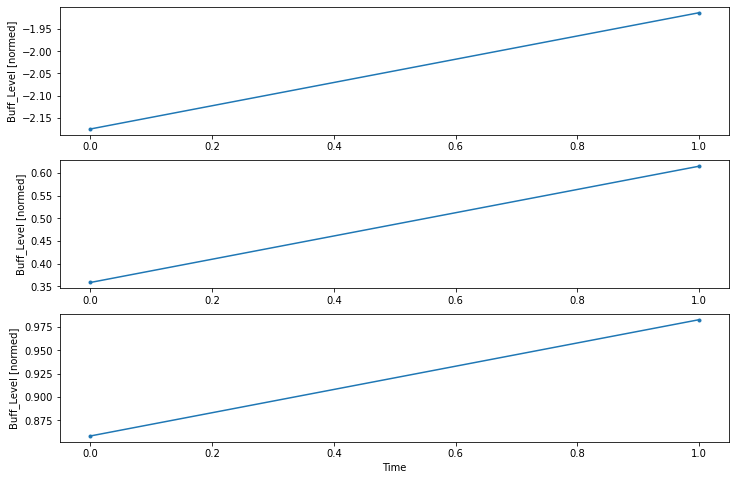

In [39]:
w2.plot(plot_col='Buff_Level')

In [40]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [41]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [42]:
w2.train.element_spec

(TensorSpec(shape=(None, 2, 20), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 2, 1), dtype=tf.float32, name=None))

In [43]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (23, 2, 20)
Labels shape (batch, time, features): (23, 2, 1)


In [44]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['P.1203 QoE'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['P.1203 QoE']

In [45]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (24, 1, 20)
Labels shape (batch, time, features): (24, 1, 1)


In [46]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [47]:
baseline = Baseline(label_index=column_indices['P.1203 QoE'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 197ms/step - loss: 0.0011 - mean_absolute_error: 0.0327


In [49]:
wide_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['P.1203 QoE'])

wide_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['P.1203 QoE']

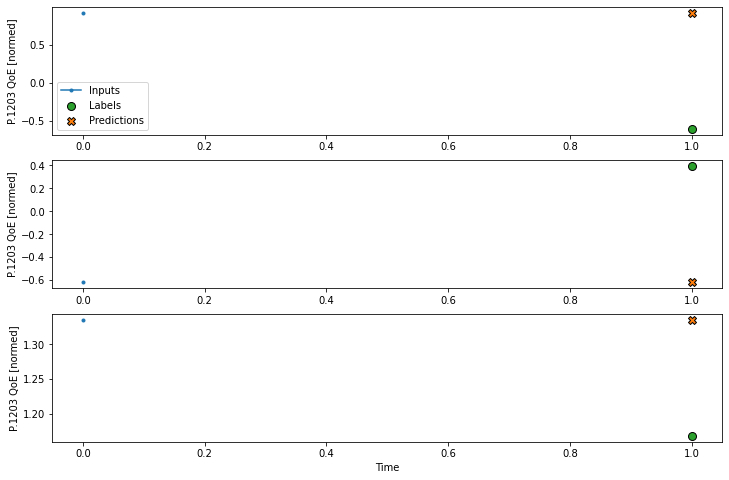

In [50]:
wide_window.plot(baseline)

In [51]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [52]:
print(linear._get_trainable_state())

In [53]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (24, 1, 20)
Output shape: (24, 1, 1)


In [54]:
linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (24, 1, 1)                21        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [55]:
MAX_EPOCHS = 200

def compile_and_fit(model, window, patience=20):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [56]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
1/1 [==============================] - 0s 494ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/200
1/1 [==============================] - 0s 85ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/200
1/1 [==============================] - 0s 86ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/200
1/1 [==============================] - 0s 85ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/200
1/1 [==============================] - 0s 89ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/200
1/1 [==============================] - 0s 84ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/200
1/1 [==============================] - 0s 101ms/step - loss: nan - mean_absolute_error:

In [57]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (24, 1, 20)
Output shape: (24, 1, 1)


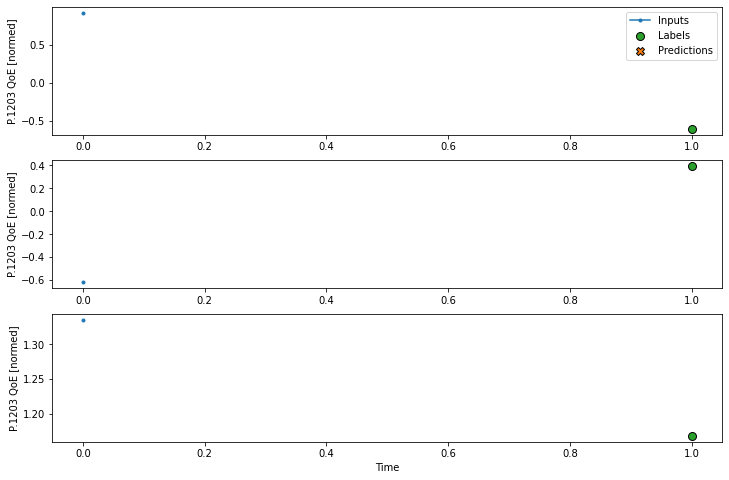

In [58]:
wide_window.plot(linear)

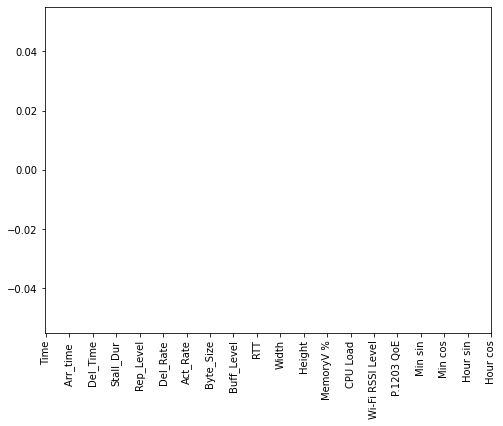

In [59]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [60]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
1/1 [==============================] - 1s 727ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/200
1/1 [==============================] - 0s 87ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/200
1/1 [==============================] - 0s 89ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/200
1/1 [==============================] - 0s 86ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/200
1/1 [==============================] - 0s 92ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 6/200
1/1 [==============================] - 0s 87ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 7/200
1/1 [==============================] - 0s 85ms/step - loss: nan - mean_absolute_error: 

In [63]:
CONV_WIDTH = 1
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['P.1203 QoE'])

conv_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['P.1203 QoE']

Text(0.5, 1.0, 'Given 3 hours of inputs, predict 1 hour into the future.')

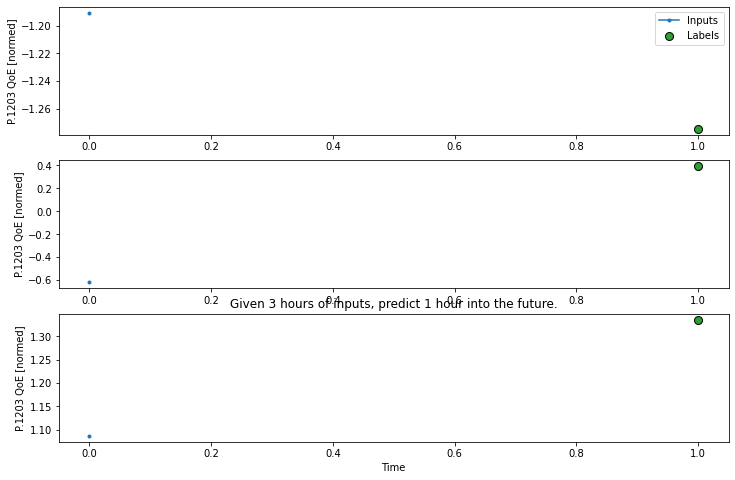

In [64]:
conv_window.plot()
plt.title("Given 3 hours of inputs, predict 1 hour into the future.")

In [65]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [66]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (24, 1, 20)
Output shape: (24, 1, 1)


In [67]:
history = compile_and_fit(multi_step_dense, conv_window)
IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 66ms/step - loss: nan - mean_absolute_error: nan


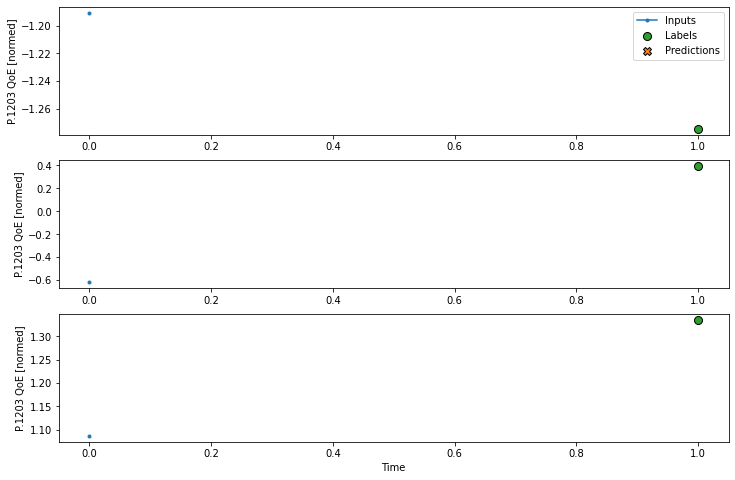

In [68]:
conv_window.plot(multi_step_dense)

In [69]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (24, 1, 20)
Output shape: (24, 1, 1)


In [70]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [71]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (24, 1, 20)
Output shape: (24, 1, 1)


In [72]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

1/1 [==============================] - 0s 65ms/step - loss: nan - mean_absolute_error: nan


In [73]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (24, 1, 20)
Labels shape: (24, 1, 1)
Output shape: (24, 1, 1)


In [74]:
LABEL_WIDTH = 1
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['P.1203 QoE'])

wide_conv_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['P.1203 QoE']

In [75]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (24, 1, 20)
Labels shape: (24, 1, 1)
Output shape: (24, 1, 1)


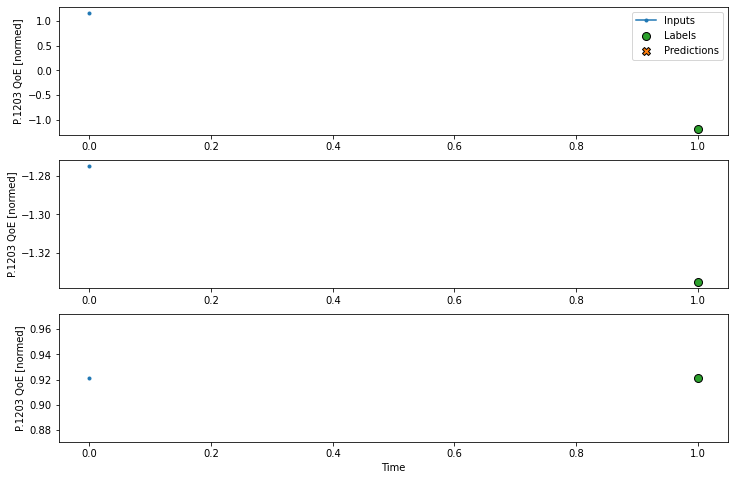

In [76]:
wide_conv_window.plot(conv_model)

In [77]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [78]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (24, 1, 20)
Output shape: (24, 1, 1)


In [79]:
history = compile_and_fit(lstm_model, wide_window)
#lstm_model.save('lstm_model.pt')
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

1/1 [==============================] - 0s 65ms/step - loss: nan - mean_absolute_error: nan


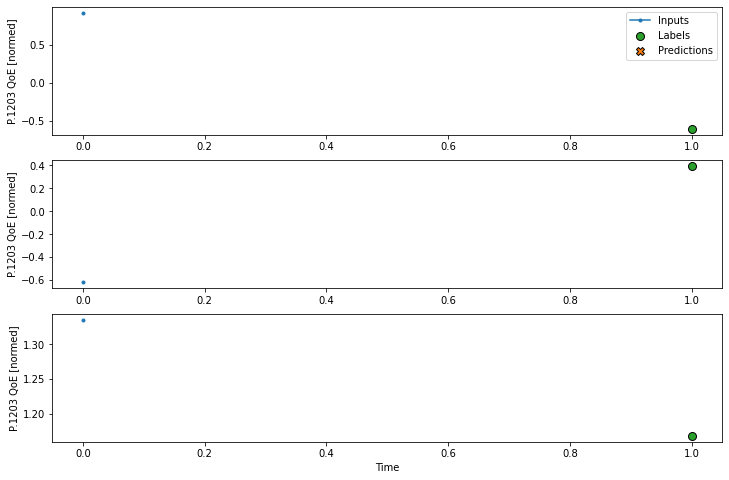

In [80]:
wide_window.plot(lstm_model)

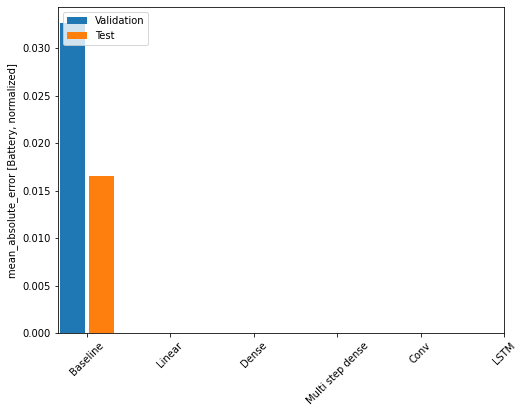

In [81]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Battery, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [82]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.0166
Linear      : nan
Dense       : nan
Multi step dense: nan
Conv        : nan
LSTM        : nan


In [83]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=1, label_width=1, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (24, 1, 20)
Labels shape (batch, time, features): (24, 1, 20)


In [84]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [85]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

1/1 [==============================] - 0s 118ms/step - loss: nan - mean_absolute_error: nan


In [86]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [87]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

1/1 [==============================] - 0s 64ms/step - loss: nan - mean_absolute_error: nan


In [88]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

/Users/wellimc/opt/miniconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:923: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [89]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [90]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

OverflowError: cannot convert float infinity to integer

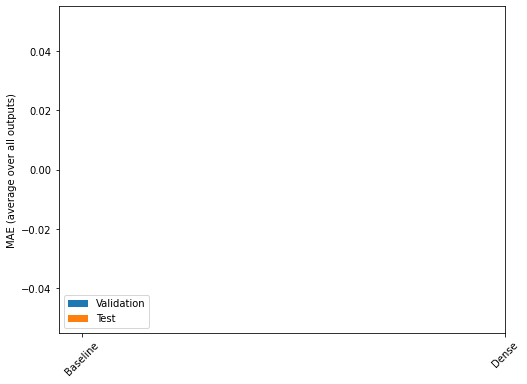

In [91]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [92]:
print(val_performance)

{'Baseline': [nan, nan], 'Dense': [nan, nan]}


In [93]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : nan
Dense          : nan


Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24]
Label column name(s): None

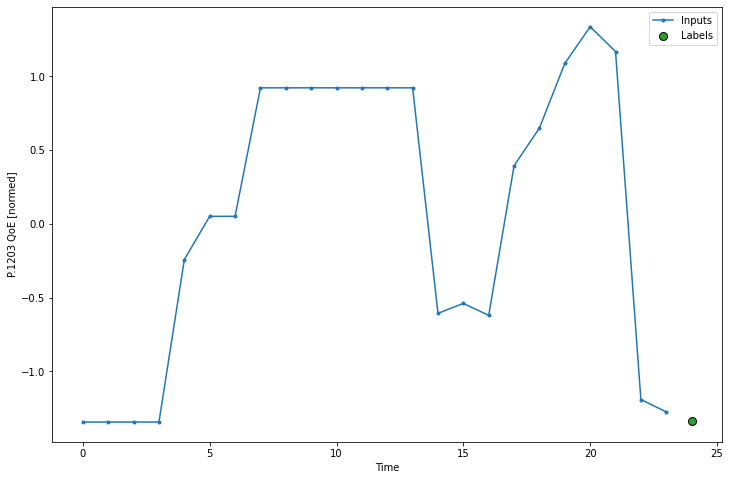

In [95]:
OUT_STEPS = 1
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [96]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

/Users/wellimc/opt/miniconda3/lib/python3.8/site-packages/keras/utils/generic_utils.py:923: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [97]:
print(multi_performance)

{}


In [98]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

OverflowError: cannot convert float infinity to integer

In [ ]:
print(multi_val_performance)

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

In [ ]:
print(multi_val_performance)

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [ ]:
multi_val_performance.values()

In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

In [ ]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [ ]:
print(multi_val_performance.values())

In [ ]:

x = np.arange(len(multi_performance))
width = 0.3
print(multi_performance.values())
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[1] for v in multi_val_performance.values()]
test_mae = [v[1] for v in multi_val_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()



In [ ]:
for name, value in multi_val_performance.items():
  print(f'{name:8s}: {value[1]:0.4f}')